In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

In [2]:
!pip install holidays

In [3]:
import holidays
import datetime as dt
from holidays import country_holidays

# The below dataset represents crimes that happened in Chicago for the year 2020.

In [4]:
df = pd.read_csv('/Users/Rashad/Documents/GitHub/CORE_Project-4_Part_1/Data/the_stuffChicago-Crime_2020.csv')
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,11939526,01/01/2020 01:00:00 AM,THEFT,FROM BUILDING,HOTEL/MOTEL,False,False,123,1.0,4.0,41.872709,-87.624188
1,11957916,01/01/2020 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,2221,22.0,21.0,41.731514,-87.661723
2,12001908,01/01/2020 01:00:00 AM,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,RESIDENCE,False,True,2232,22.0,34.0,41.709028,-87.654061
3,11944113,01/01/2020 01:00:00 PM,CRIMINAL DAMAGE,TO STATE SUP PROP,ALLEY,False,False,1532,15.0,37.0,41.892236,-87.749273
4,11939609,01/01/2020 01:00:00 AM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1634,16.0,31.0,41.939638,-87.754883


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212204 entries, 0 to 212203
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    212204 non-null  int64  
 1   Date                  212204 non-null  object 
 2   Primary Type          212204 non-null  object 
 3   Description           212204 non-null  object 
 4   Location Description  210537 non-null  object 
 5   Arrest                212204 non-null  bool   
 6   Domestic              212204 non-null  bool   
 7   Beat                  212204 non-null  int64  
 8   District              212204 non-null  float64
 9   Ward                  212195 non-null  float64
 10  Latitude              207951 non-null  float64
 11  Longitude             207951 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 16.6+ MB


# Cleaning and preparing data.

In [6]:
#Dropping columns and making a cleaner dataframe
clean_df = df.drop(columns=['ID','Arrest','Domestic','Beat','Ward','Latitude','Longitude'])
clean_df.head()

,Date,Primary Type,Description,Location Description,District
0,01/01/2020 01:00:00 AM,THEFT,FROM BUILDING,HOTEL/MOTEL,1.0
1,01/01/2020 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,22.0
2,01/01/2020 01:00:00 AM,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,RESIDENCE,22.0
3,01/01/2020 01:00:00 PM,CRIMINAL DAMAGE,TO STATE SUP PROP,ALLEY,15.0
4,01/01/2020 01:00:00 AM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,16.0


In [7]:
#converting column 'Date' datatype to datatime
clean_df['Date'] = pd.to_datetime( clean_df['Date'], format='%m/%d/%Y %I:%M:%S %p' )
display( clean_df.head() )
print()
display( clean_df.info() )

,Date,Primary Type,Description,Location Description,District
0,2020-01-01 01:00:00,THEFT,FROM BUILDING,HOTEL/MOTEL,1.0
1,2020-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,22.0
2,2020-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,RESIDENCE,22.0
3,2020-01-01 13:00:00,CRIMINAL DAMAGE,TO STATE SUP PROP,ALLEY,15.0
4,2020-01-01 01:00:00,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,16.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212204 entries, 0 to 212203
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  212204 non-null  datetime64[ns]
 1   Primary Type          212204 non-null  object        
 2   Description           212204 non-null  object        
 3   Location Description  210537 non-null  object        
 4   District              212204 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 8.1+ MB


None

In [8]:
#convert column 'District' datatype to integer
clean_df['District'] = clean_df['District'].astype('int64')  #cosmetic - this removed the decimal\fraction
clean_df['District'] = clean_df['District'].astype('str')  #this converted to target datatype

In [9]:
clean_df.info()   #confirming change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212204 entries, 0 to 212203
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  212204 non-null  datetime64[ns]
 1   Primary Type          212204 non-null  object        
 2   Description           212204 non-null  object        
 3   Location Description  210537 non-null  object        
 4   District              212204 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 8.1+ MB


In [10]:
#filling NaN values of column 'Location Description'
#clean_df.loc[:'Location Description'].fillna('No Location/Missing',inplace=True)
clean_df['Location Description'].fillna('No Location/Missing',inplace=True)

In [11]:
#making copy of Date column for possible future use.
clean_df['Date2'] = clean_df['Date'].copy()

In [12]:
clean_df.info()   #confirming change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212204 entries, 0 to 212203
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  212204 non-null  datetime64[ns]
 1   Primary Type          212204 non-null  object        
 2   Description           212204 non-null  object        
 3   Location Description  212204 non-null  object        
 4   District              212204 non-null  object        
 5   Date2                 212204 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 9.7+ MB


In [13]:
#setting 'Date' column as index so that I can perform time series analysis.
clean_df = clean_df.set_index("Date")
clean_df.head(2)

,Primary Type,Description,Location Description,District,Date2
Date,,,,,
2020-01-01 01:00:00,THEFT,FROM BUILDING,HOTEL/MOTEL,1,2020-01-01 01:00:00
2020-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,22,2020-01-01 13:00:00


## (Topic 1) Comparing Police Districts:
* Which district has the most crimes? Which has the least?

In [14]:
district_crime_counts = clean_df['District'].value_counts().to_frame('Total # of Crimes by District')
district_crime_counts

,Total # of Crimes by District
11,15055
6,14100
8,13173
4,12319
7,11778
25,11315
3,11036
5,10267
12,10202
10,10116


In [15]:
district_crime_counts.style.bar('Total # of Crimes by District')

,Total # of Crimes by District
11,15055
6,14100
8,13173
4,12319
7,11778
25,11315
3,11036
5,10267
12,10202
10,10116


1. District 11 has the highest number of crimes.
2. District 32 has the lowest number of crimes.
---

# (Topic 4) Comparing Months:
* What months have the most crime? What months have the least?
* Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [16]:
#Extracting month from datetime index and adding a new 'Month_Name' column to dataframe.
#clean_df['Month_by_numb'] = clean_df.index.month
#clean_df['Month_by_numb'] = clean_df['Month_by_numb'].astype('int64')

clean_df['Month_Name'] = clean_df.index.month_name()
clean_df.head(3)

,Primary Type,Description,Location Description,District,Date2,Month_Name
Date,,,,,,
2020-01-01 01:00:00,THEFT,FROM BUILDING,HOTEL/MOTEL,1,2020-01-01 01:00:00,January
2020-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,22,2020-01-01 13:00:00,January
2020-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,RESIDENCE,22,2020-01-01 01:00:00,January


In [17]:
monthly_crime_counts = clean_df['Month_Name'].value_counts().to_frame('Total # of Crimes by Month')
monthly_crime_counts

,Total # of Crimes by Month
January,19939
August,19919
July,19644
October,18440
February,18200
September,17945
June,17669
May,17611
March,16753
November,16649


In [18]:
monthly_crime_counts.style.bar('Total # of Crimes by Month')

,Total # of Crimes by Month
January,19939
August,19919
July,19644
October,18440
February,18200
September,17945
June,17669
May,17611
March,16753
November,16649


1. The month of **January** as the **most amount of crimes**.
2. The month of **April** has the **least amount of crimes**.
---

* Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [19]:
clean_df.head(2)  #quick view of dataframe

,Primary Type,Description,Location Description,District,Date2,Month_Name
Date,,,,,,
2020-01-01 01:00:00,THEFT,FROM BUILDING,HOTEL/MOTEL,1,2020-01-01 01:00:00,January
2020-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,22,2020-01-01 13:00:00,January


In [20]:
crimes_by_month = clean_df.groupby('Primary Type')['Month_Name'].value_counts().sort_index()
crimes_by_month

Primary Type       Month_Name
ARSON              April          36
                   August         57
                   December       40
                   February       31
                   January        23
                                ... 
WEAPONS VIOLATION  March         464
                   May           792
                   November      777
                   October       806
                   September     831
Name: Month_Name, Length: 340, dtype: int64

In [21]:
#convert to dataframe and reset_index()
plot_crimes_by_month_df = crimes_by_month.to_frame('# of Crimes').reset_index()
plot_crimes_by_month_df

,Primary Type,Month_Name,# of Crimes
0,ARSON,April,36
1,ARSON,August,57
2,ARSON,December,40
3,ARSON,February,31
4,ARSON,January,23
...,...,...,...
335,WEAPONS VIOLATION,March,464
336,WEAPONS VIOLATION,May,792
337,WEAPONS VIOLATION,November,777
338,WEAPONS VIOLATION,October,806


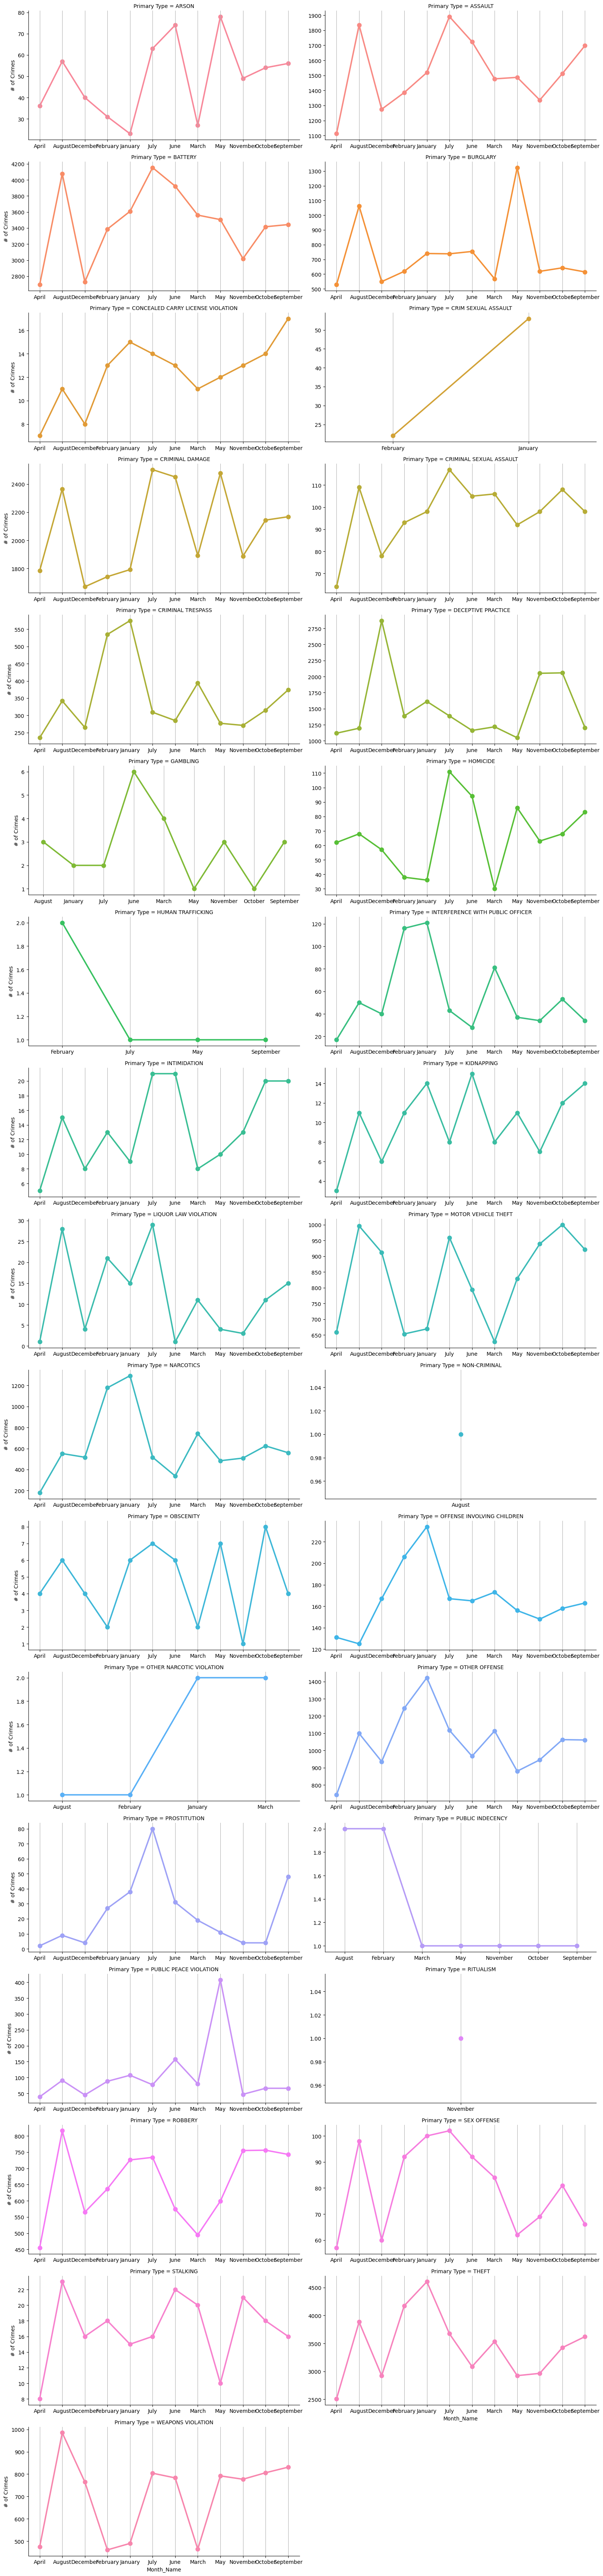

In [22]:
g = sns.catplot(data=plot_crimes_by_month_df, x='Month_Name', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

The below crimes did not follow the pattern of having the most instances in January and the least instances in April.
* ARSON
* OBSCENITY
* MOTOR VEHICLE THEFT
* HOMICIDE
* DECEPTIVE PRACTICE
* CRIMINAL DAMAGE
___

# (Topic 5) Comparing Holidays:
* Are there any holidays that show an increase in the # of crimes?
* Are there any holidays that show a decrease in the # of crimes?

In [23]:
clean_df.head(2)  #quick view of dataframe

,Primary Type,Description,Location Description,District,Date2,Month_Name
Date,,,,,,
2020-01-01 01:00:00,THEFT,FROM BUILDING,HOTEL/MOTEL,1,2020-01-01 01:00:00,January
2020-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,22,2020-01-01 13:00:00,January


In [24]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 212204 entries, 2020-01-01 01:00:00 to 2020-12-31 00:55:00
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Primary Type          212204 non-null  object        
 1   Description           212204 non-null  object        
 2   Location Description  212204 non-null  object        
 3   District              212204 non-null  object        
 4   Date2                 212204 non-null  datetime64[ns]
 5   Month_Name            212204 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 11.3+ MB


In [25]:
## making a date range that covers full dataset
all_days = pd.date_range(clean_df['Date2'].min(), clean_df['Date2'].max())
all_days

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [26]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [27]:
## Testing first date
print(all_days[0])
us_holidays.get(all_days[0])

2020-01-01 00:00:00


"New Year's Day"

In [28]:
## Getting us holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]
holiday_list[:5]

["New Year's Day", None, None, None, None]

In [29]:
## Saving holiday types as columns
clean_df["US Holiday"] = [us_holidays.get(day) for day in clean_df['Date2']]
clean_df.head()

,Primary Type,Description,Location Description,District,Date2,Month_Name,US Holiday
Date,,,,,,,
2020-01-01 01:00:00,THEFT,FROM BUILDING,HOTEL/MOTEL,1,2020-01-01 01:00:00,January,New Year's Day
2020-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,22,2020-01-01 13:00:00,January,New Year's Day
2020-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,RESIDENCE,22,2020-01-01 01:00:00,January,New Year's Day
2020-01-01 13:00:00,CRIMINAL DAMAGE,TO STATE SUP PROP,ALLEY,15,2020-01-01 13:00:00,January,New Year's Day
2020-01-01 01:00:00,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,16,2020-01-01 01:00:00,January,New Year's Day


In [30]:
holiday_crime = clean_df['US Holiday'].value_counts()
holiday_crime

New Year's Day                 1003
Independence Day                744
Independence Day (Observed)     688
Memorial Day                    645
Martin Luther King Jr. Day      621
Labor Day                       606
Washington's Birthday           603
Columbus Day                    577
Veterans Day                    488
Christmas Day                   401
Thanksgiving                    394
Name: US Holiday, dtype: int64

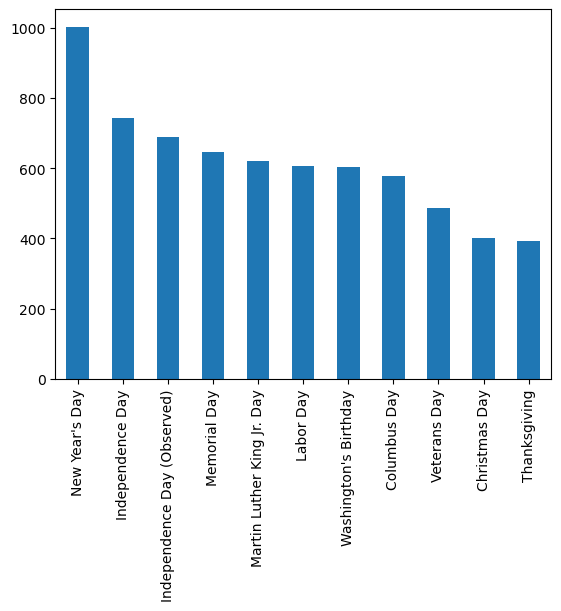

In [31]:
holiday_crime.plot.bar();

* Are there any holidays that show an increase in the # of crimes?
    * **The holiday that has the most instances of crimes is New Year's Day.**
* Are there any holidays that show a decrease in the # of crimes?
    * **The holiday that has the least instances of crimes is Thanksgiving.**